1. Importing the required libraries for EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                            #VISUALISATION
import matplotlib.pyplot as plt                  #VISUALISATION
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
#importing the data sheet
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [ ]:
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
dataset.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


1.2 Checking the types of data and basic summary stats

In [ ]:
#checking is there any value present in data or not.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#complete description of customer data
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


2. Dropping irrelevant columns

In [ ]:
#droping down of columns which are similar after checking their correletion rate.
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [ ]:
#code for droping down experience column as it is similar to age 
dataset = dataset.drop(['ID', 'Experience'],axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


3. EDA

In [ ]:
#to check no. of unique information
dataset.nunique()


Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
#droping down zip code column
dataset.drop('ZIP Code', axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
dataset.shape

(5000, 12)

In [ ]:
#checking no. of people with 0 mortage.
(dataset.Mortgage==0).sum()

3462

In [ ]:
#checking no. of people with 0 credit card spending per month.
(dataset.CCAvg==0).sum()

106

In [ ]:
#value count for categorial column
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
#comparison graph for education and security accounts
sns.countplot(y='Education', data = dataset , hue = 'Securitties Account')
plt.title('Education vs Securitties Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

In [ ]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Text(0.5, 0, 'Age')

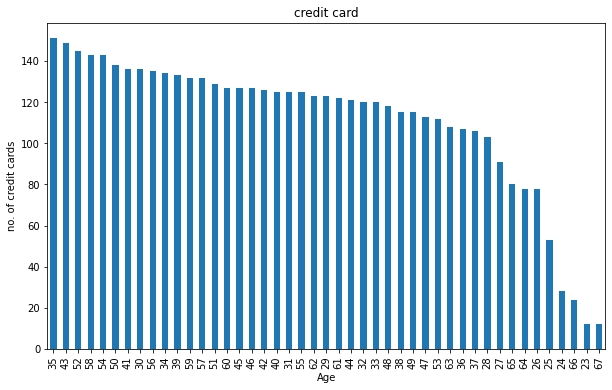

In [ ]:
#graph study for use of credit card as per ages
dataset['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title('credit card')
plt.ylabel('no. of credit cards')
plt.xlabel('Age')

In [ ]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

Univariate Analysis

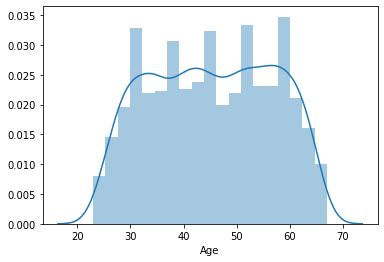

In [ ]:
#the age graph looks symetric
sns.distplot(dataset.Age);


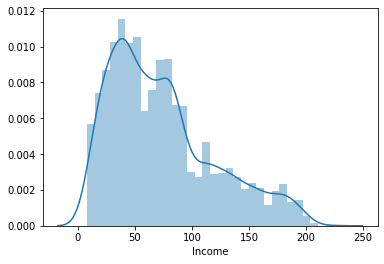

In [ ]:
sns.distplot(dataset.Income);

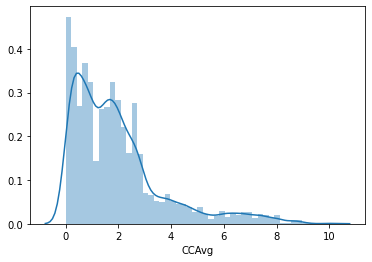

In [ ]:
sns.distplot(dataset.CCAvg);

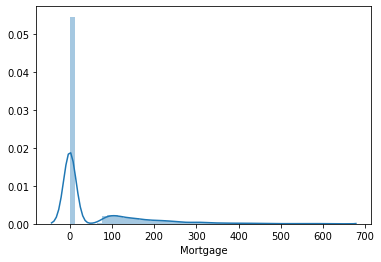

In [ ]:
sns.distplot(dataset.Mortgage);

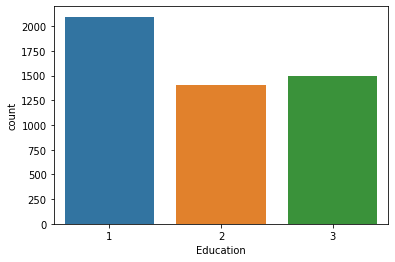

In [ ]:
sns.countplot(dataset.Education)

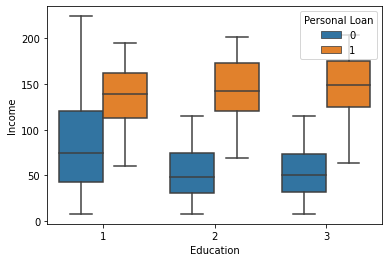

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

Education have nothing to do with personal loan but income above 100 are availing it

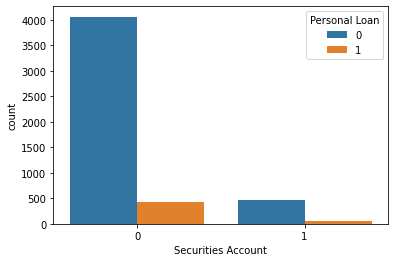

In [ ]:
sns.countplot(x='Securities Account', data=dataset, hue='Personal Loan')

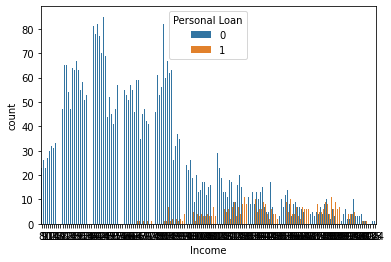

In [ ]:
sns.countplot(x='Income', data=dataset, hue='Personal Loan')

People with more income have availed the loan

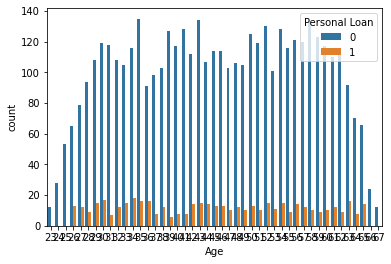

In [ ]:
sns.countplot(x='Age',data=dataset,hue='Personal Loan')

People with age under 20 have availed loan

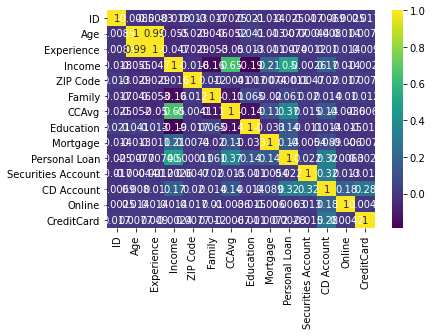

In [ ]:
sns.heatmap(dataset.corr(),cmap='viridis',annot=True);

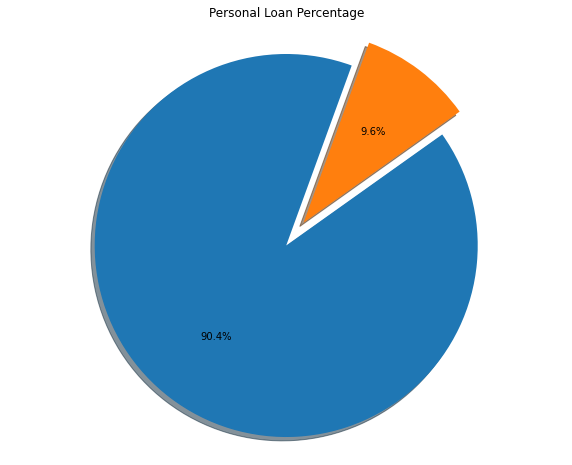

In [ ]:
DF=pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

9.6% people are availing loan

Setting datas except loan in one var and loan in var

In [ ]:
datax=dataset.loc[:, dataset.columns != "Personal Loan"]
datay=dataset["Personal Loan"]

In [ ]:
datax.shape,datay.shape

((5000, 13), (5000,))

In [ ]:
datax.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


**Transformation of feature** **variable**

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["Income"].values.reshape(-1,1))
t = pt.transform(datax["Income"].values.reshape(-1,1))

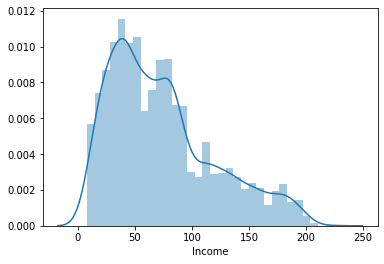

In [ ]:
sns.distplot(dataset.Income)

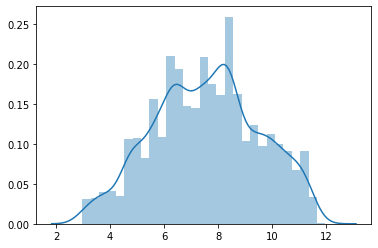

In [ ]:
sns.distplot(t)

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["CCAvg"].values.reshape(-1,1))
t = pt.transform(datax["CCAvg"].values.reshape(-1,1))

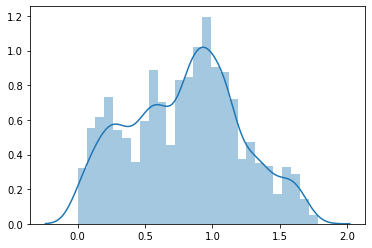

In [ ]:
sns.distplot(t)

In [ ]:
datax['Mortgage_int'] = pd.cut(datax.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
datax.drop('Mortgage', axis=1, inplace=True)

In [ ]:
datax.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,1,25,1,49,91107,4,1.6,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,1,0


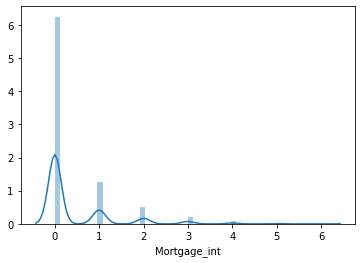

In [ ]:
sns.distplot(datax.Mortgage_int)

**Spliting data into training and test**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size =0.3, stratify = datay, random_state=0)


**Using different prediction modela**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
class_names = ['will not take loan', 'take loan']

Training Accuracy: 0.91
Testing Accuracy: 0.91
Precision: 0.53
Recall: 0.34


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

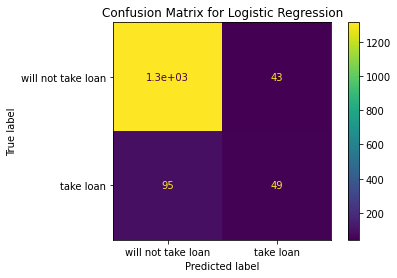

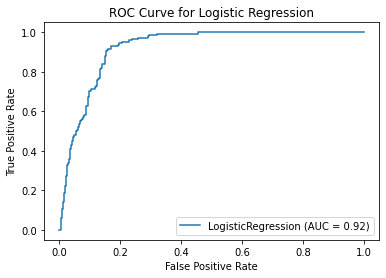

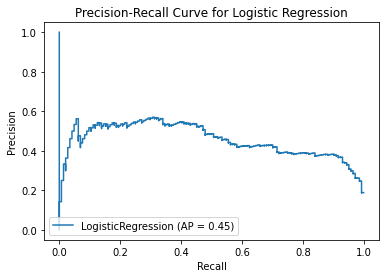

In [ ]:
train_score = log_reg.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
y_pred_logi = log_reg.predict(test_x)
precision_logi = precision_score(test_y, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_y, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_x, test_y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_x, test_y)
plt.title('Precision-Recall Curve for Logistic Regression')

**Random forest classification**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Training Accuracy: 0.91
Testing Accuracy: 0.99
Precision: 1.0
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

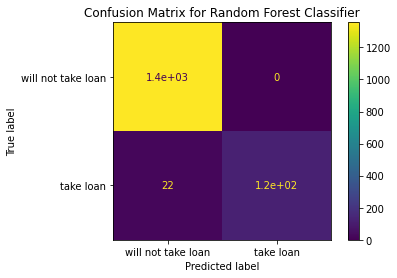

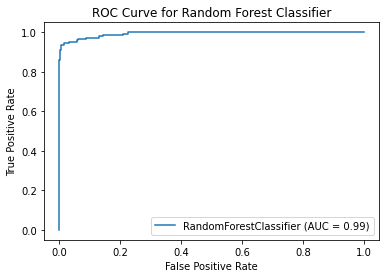

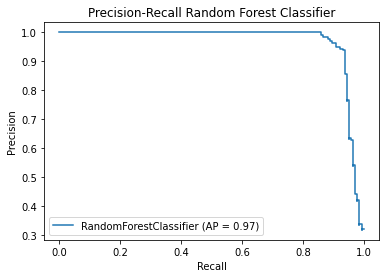

In [ ]:
rain_score = rfc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rfc.predict(test_x)

precision_rf = precision_score(test_y, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rfc, test_x, test_y, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rfc, test_x, test_y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, test_x, test_y)
plt.title('Precision-Recall Random Forest Classifier')

**Discion tree classification**

In [ ]:
   from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
y_pred=dtc.predict(test_x)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.93
Recall: 0.9


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

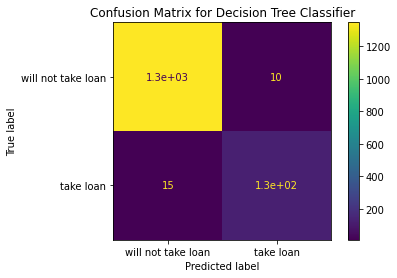

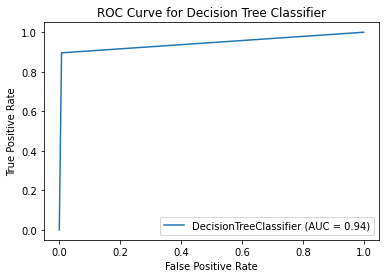

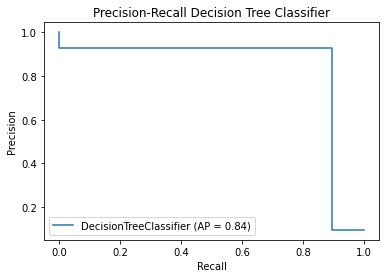

In [ ]:
train_score = dtc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_x, test_y, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

**Karnott nearest neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_x,train_y)
y_pred=k.predict(test_x)

Training Accuracy: 0.9
Testing Accuracy: 0.9
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

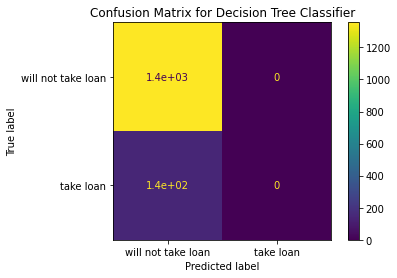

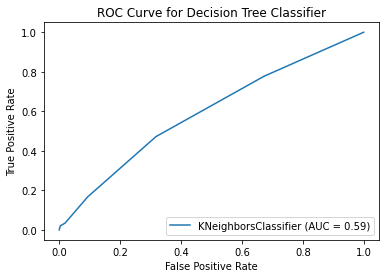

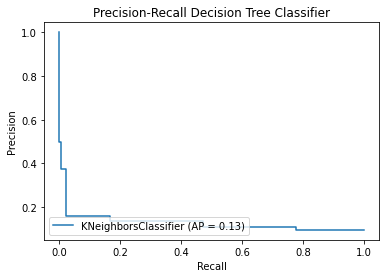

In [ ]:
train_score = k.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k, test_x, test_y, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')